In [33]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [34]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [35]:
YEARNUM="2018"
MONTHNUM="06"
OBS="ohp"

In [36]:
#monthfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_11.csv'
#yearfile='MERRA2_2016_inst1_2d_asm_Nx_M2I1NXASM_ctio_AllYear.csv'

In [37]:
#monthfile='MERRA2_'+YEARNUM+'_inst1_2d_asm_Nx_M2I1NXASM_ohp_06.csv'
yearfile='MERRA2_'+YEARNUM+'_inst1_2d_asm_Nx_M2I1NXASM_'+OBS+'_AllYear.csv'

## Per month

In [38]:
df_month=pd.read_csv(monthfile)

NameError: name 'monthfile' is not defined

In [ ]:
df_month.describe()

In [ ]:
o3_month=df_month["ozone"]

In [ ]:
mean_O3_m = np.mean(o3_month)
variance_O3_m = np.var(o3_month)
sigma_O3_m = np.sqrt(variance_O3_m)

In [ ]:
mean_O3_m=np.trunc(mean_O3_m*10)/10
sigma_O3_m=np.trunc(sigma_O3_m*10)/10

In [ ]:
print mean_O3_m 
print variance_O3_m 
print sigma_O3_m 

In [ ]:
variation_m = variance_O3_m/mean_O3_m  
print 'monthly variation = '

In [ ]:
title = "Monthly variation of O3 (nov 2017), mean = {} std = {}".format(mean_O3_m ,sigma_O3_m)

In [ ]:
n, bins, patches = plt.hist(o3_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('$O_3$ in Dobson unit')
plt.savefig('HistoO32017_06.pdf')

## Per year

In [39]:
df_year=pd.read_csv(yearfile)

In [40]:
df_year.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,93605.010626,286.482574,286.156667,345.078004,0.007404,0.021813,17.708672,286.245535,0.021388,0.060915,-0.140465,-0.608788,-0.342864,-0.981685
std,642.563931,8.756767,9.196822,38.505628,0.000826,0.041721,8.039066,10.482519,3.024915,2.052015,4.064382,3.049534,2.088572,4.108916
min,91121.617188,266.681335,266.794922,260.325714,0.005581,0.000000,2.350126,266.385925,-13.590304,-9.430898,-16.700460,-11.513482,-8.019993,-14.637464
25%,93300.148438,279.055763,278.585747,315.535461,0.006771,0.000093,11.400371,278.140938,-1.552075,-0.858643,-2.266323,-2.273400,-1.280303,-3.459140
50%,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
75%,94017.107422,293.265198,293.074280,369.230484,0.007920,0.024576,24.237048,293.532425,1.971984,1.251754,2.708717,1.319634,0.831863,1.857141
max,95630.148438,307.667267,309.370941,476.769897,0.010235,0.507080,41.252686,315.242340,10.241591,6.991255,13.905725,11.095821,7.683163,13.775771


In [41]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,PS,T10M,T2M,TO3,TOX,TQI,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0.05,92302.062500,273.110608,271.944415,300.570044,0.006450,0.000000,5.619297,270.505684,-5.613892,-3.875367,-8.013594,-6.176801,-4.274966,-8.279870
0.10,92726.689063,275.120847,274.126968,306.248471,0.006568,0.000000,7.057070,272.605145,-3.382963,-2.225191,-5.243864,-4.598542,-3.170159,-6.778754
0.50,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
0.90,94195.792188,298.313348,298.947134,402.105991,0.008627,0.067557,28.010021,301.164572,3.421493,2.469278,4.260659,3.108744,2.218974,4.063940
0.95,94403.677344,300.995758,301.934918,421.593069,0.009042,0.104558,30.763211,305.357976,4.236855,3.011753,5.114908,4.205025,2.984312,5.398069


In [42]:
o3_year=df_year["TO3"]

In [43]:
mean_O3_y = np.mean(o3_year)
variance_O3_y = np.var(o3_year)
sigma_O3_y = np.sqrt(variance_O3_y)

In [44]:
mean_O3_y=np.trunc(mean_O3_y*10)/10
sigma_O3_y=np.trunc(sigma_O3_y*10)/10

In [45]:
print mean_O3_y 
print variance_O3_y 
print sigma_O3_y 

345.0
1482.42919172
38.5


In [46]:
title = "Yearly variation of O3 (year {} at {} ), mean = {} std = {}".format(YEARNUM,OBS,mean_O3_y ,sigma_O3_y)

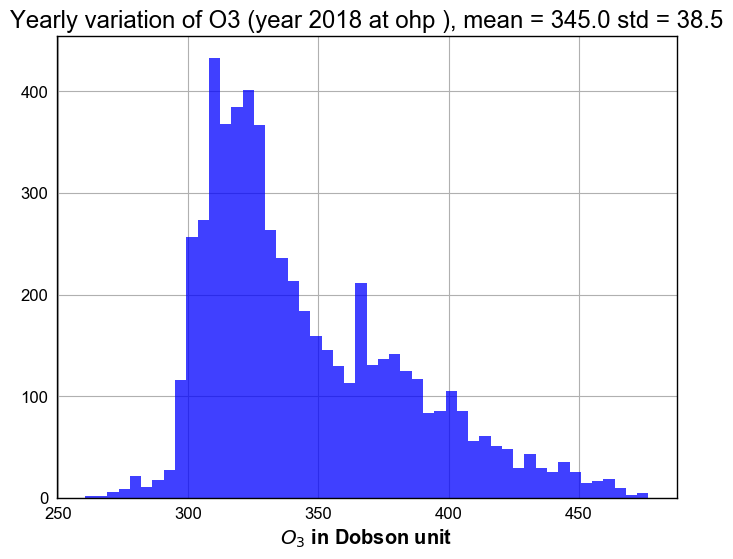

In [47]:
n, bins, patches = plt.hist(o3_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('$O_3$ in Dobson unit')
plt.savefig('HistoO32018_allyear.pdf')